In [2]:
from plots import *
import scipy.io
import numpy as np
%load_ext autoreload
%autoreload 2


c:\Users\Bruker\anaconda3\envs\SAXSTT\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Bruker\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


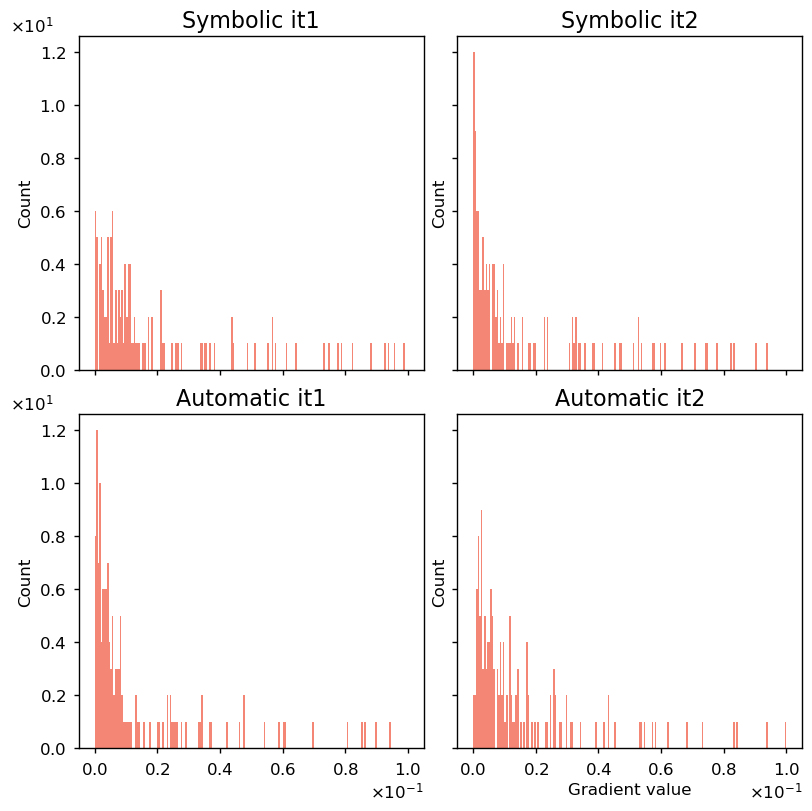

In [26]:
filenames = [r"current_opt_saxs_0_it1.mat", r"current_opt_saxs_0_it2.mat", "current_opt_saxs_1_it1.mat", "current_opt_saxs_1_it2.mat"]
paths = [r"../Data sets/Debug Data/" + name  for name in filenames]
keys = ["grad_a", "grad_a", "grad_a", "grad_a"]
titles = ["Symbolic it1", "Symbolic it2", "Automatic it1", "Automatic it2"]

plot_visualisation_grads(paths, keys, titles, range = (1e-9, 0.1))



In [3]:
"""if np.any( mat_dict_old[keys[-1]] != mat_dict_new[keys[1]]) :
    print("A difference!")
else:
    print("Identical!")


print(test_mat.keys())"""

dict_keys(['__header__', '__version__', '__globals__', 'grad_a', 'e', 'a_tomo'])


In [22]:

sym_it1 = scipy.io.loadmat(r"../Data sets/Debug Data/grad_coeffs_0_it1.mat")
auto_it1 = scipy.io.loadmat(r"../Data sets/Debug Data/grad_coeffs_1_it1.mat")

print(sym_it1["grad_a"].shape)

(4, 4, 4, 4)


(array([  2.,   1.,   8.,  41., 180.,  14.,   5.,   3.,   1.,   1.]),
 array([-0.4661217 , -0.35546562, -0.24480954, -0.13415346, -0.02349738,
         0.0871587 ,  0.19781478,  0.30847086,  0.41912694,  0.52978302,
         0.6404391 ]),
 <BarContainer object of 10 artists>)

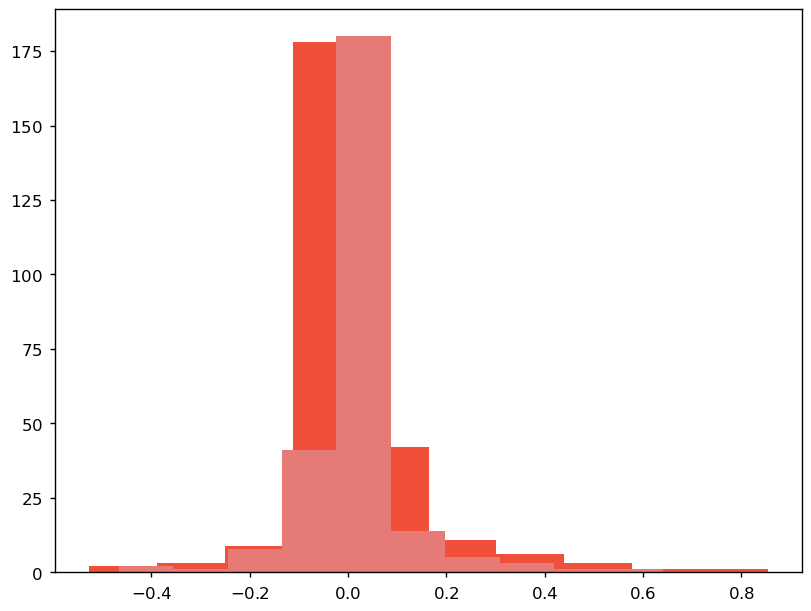

In [24]:
import matplotlib.pyplot as plt

plt.hist(np.reshape(sym_it1["grad_a"], -1) )
plt.hist(np.reshape(auto_it1["grad_a"], -1) )

In [15]:
diff = np.abs(sym_it1[keys[0]] - auto_it1[keys[-1]] )

print(diff[diff > 1e-15])

[2.45161453e-02 6.73916255e-02 2.40662357e-01 9.54120576e-02
 2.02036616e-01 2.71981338e-01 1.20147178e-01 3.39228569e-01
 1.35185640e-03 3.10578915e-01 4.71487455e-03 8.60085917e-01
 2.79311008e-03 7.02507572e-04 6.02516166e-03 5.16499427e-03
 3.57861395e-02 4.18869436e-03 1.69612159e-02 1.04187116e-02
 2.03551603e-01 1.07579334e-01 1.38667457e-01 3.30112876e-01
 6.92395858e-01 7.48382892e-03 1.04009878e-01 1.26232206e-01
 1.39677052e-01 1.69749789e-03 1.15437544e-02 1.19809642e-02
 2.62757871e-03 5.75025892e-03 1.50402850e-02 1.42549994e-02
 2.38703060e-01 8.45683788e-03 4.40068959e-02 1.10555810e-03
 1.48021213e-01 2.20940606e-02 4.01618133e-01 2.67488268e-02
 2.44274193e-01 1.65392692e-02 2.92260402e-01 9.85934169e-02
 5.60708982e-01 8.03738814e-02 2.50890599e-01 4.69958668e-01
 2.33522913e-03 4.05636977e-02 5.04727142e-03 8.35394345e-02
 2.99566603e-02 1.38188568e-01 3.59831857e-01 4.60508086e-02
 9.36959675e-03 2.82508451e-01 3.92540962e-02 2.06161744e-01
 6.87846092e-03 6.909941

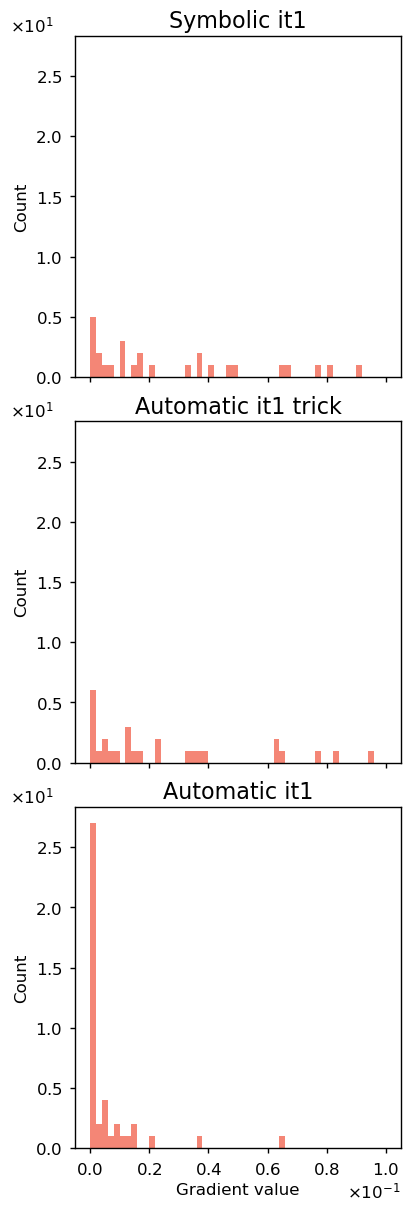

In [31]:
filenames = [r"grad_phi_0_it1.mat", r"grad_phi_1_it1_works.mat", "grad_phi_1_it1_issue.mat"]
paths = [r"../Data sets/Debug Data/" + name  for name in filenames]
keys = ["grad_phi_struct", "grad_phi_struct", "grad_phi_struct"]
titles = ["Symbolic it1", "Automatic it1 trick", "Automatic it1"]

plot_visualisation_grads(paths, keys, titles, range = (1e-9, 0.1), bins = 50)

# Note that case 1 and 2 start with the same a-params. They differ slightly. 
# Case 3 starts off differently, and in this case with a lower error from 1, but a higher it1 error. 
# Vanishing gradient problem in case 3

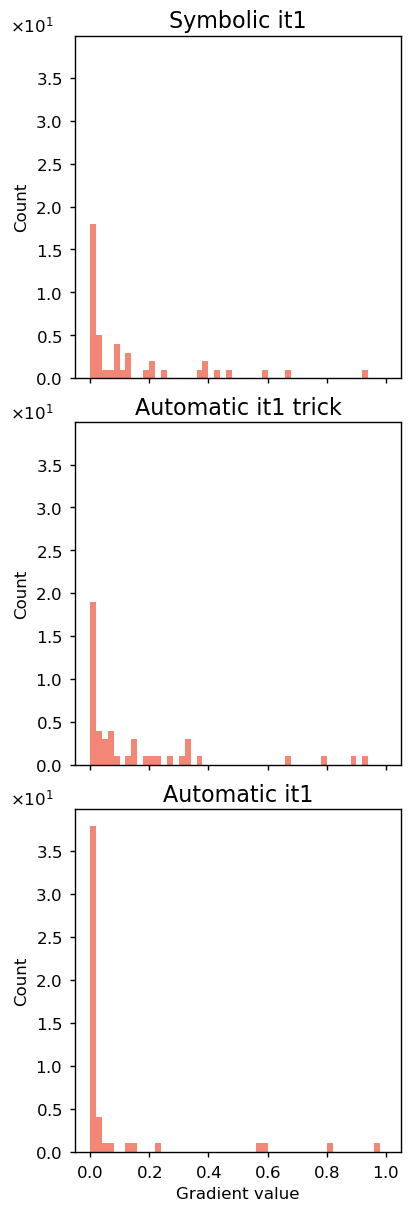

In [35]:
filenames = [r"grad_theta_0_it1.mat", r"grad_theta_1_it1_works.mat", "grad_theta_1_it1_issue.mat"]
paths = [r"../Data sets/Debug Data/" + name  for name in filenames]
keys = ["grad_theta_struct", "grad_theta_struct", "grad_theta_struct"]
titles = ["Symbolic it1", "Automatic it1 trick", "Automatic it1"]

plot_visualisation_grads(paths, keys, titles, range = (1e-9, 1), bins = 50)

In [32]:
# So far still mysterious. Time to look at the estimated coefficients

filenames = [r"symbolic_symSAXS.mat", r"AD_symSAXS.mat", "AD_python_symSAXS.mat"]
paths = [r"../Data sets\analysis\SASTT\SASTT_carbon_knot_aligned_ASTRA_correctedny4nx4\SH\optimization_output\result_SASTT_carbon_knot_aligned_ASTRA_correctedny4nx4" + name  for name in filenames]

test_data = scipy.io.loadmat(f"{paths[0]}")

print(test_data.keys())
print(test_data["s"]["a"][0,0][0,0][0].shape) #RSD: struct is called s. Want to look at coeffs, which are named a. Symmetric coeffs are in the first row, and the first column. Etc

dict_keys(['__header__', '__version__', '__globals__', 'p', 's', 'timing', 'e', '__function_workspace__'])
(4, 4, 4)


<BarContainer object of 64 artists>

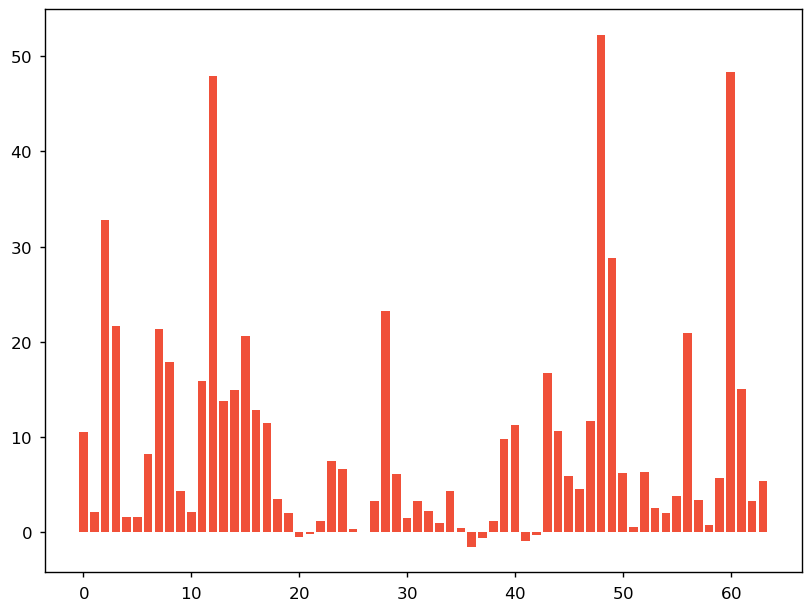

In [44]:
a_coeff_symsaxs_symbolic = np.ndarray.flatten(test_data["s"]["a"][0,0][0,0][0])
fig, ax = plt.subplots()

ax.bar(np.arange(0,len(a_coeff_symsaxs_symbolic)),a_coeff_symsaxs_symbolic )

In [81]:
from plots import *
import scipy.io
import numpy as np
%load_ext autoreload
%autoreload 2

filenames = [r"symbolic_symSAXS.mat", r"AD_symSAXS.mat", "AD_python_symSAXS.mat"]
paths = [r"../Data sets\analysis\SASTT\SASTT_carbon_knot_aligned_ASTRA_correctedny4nx4\SH\optimization_output\result_SASTT_carbon_knot_aligned_ASTRA_correctedny4nx4" + name  for name in filenames]



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


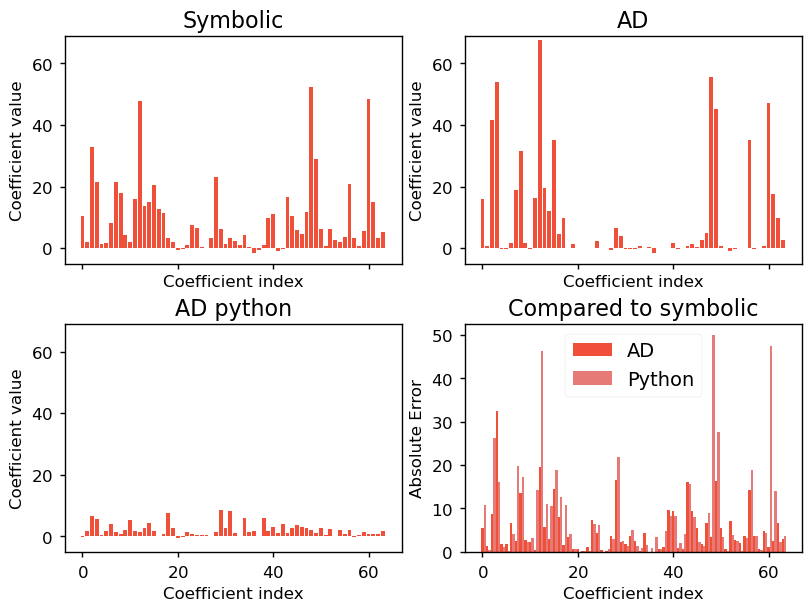

In [82]:
plot_debugging_coeffs(paths, ["Symbolic", "AD", "AD python"])

# Note that AD manage to mimick the most dominant coefficients, but not the rest.
# Note that AD python has clearly calculates too small gradients. Also remember that after the first iteration, the calculated error differs from the actual error.

# What if we normalise?

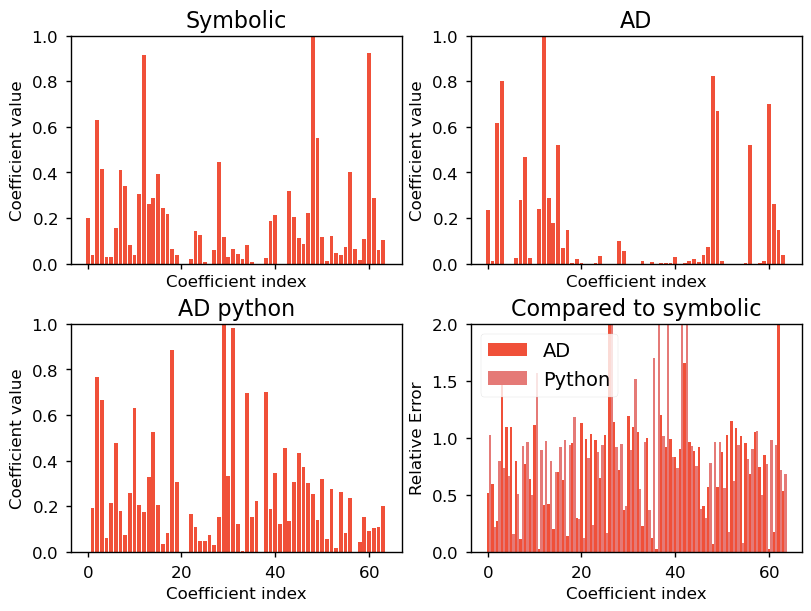

In [83]:
plot_debugging_coeffs(paths, ["Symbolic", "AD", "AD python"], normalise = True)

In [97]:
# Idea: Stepwise check first iteration. Where does the calculation suddenly differ?

#Check orientations

from plots import *
import scipy.io
import numpy as np
%load_ext autoreload
%autoreload 2

filenames = [r"_q17-40_angles_symbolic.mat", r"_q17-40_angles_symbolic_AD.mat"]#, "AD_python_symSAXS.mat"]
paths = [r"../Data sets\analysis\SASTT\SASTT_carbon_knot_aligned_ASTRA_correctedny4nx4\SH\optimization_output\result_SASTT_carbon_knot_aligned_ASTRA_correctedny4nx4" + name  for name in filenames]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
orient_dict = scipy.io.loadmat(paths[0])
#orient_dict["s"]["theta"][0,0][0,0][0]
# RSD: Note that row and column transversed compared to matlab. 

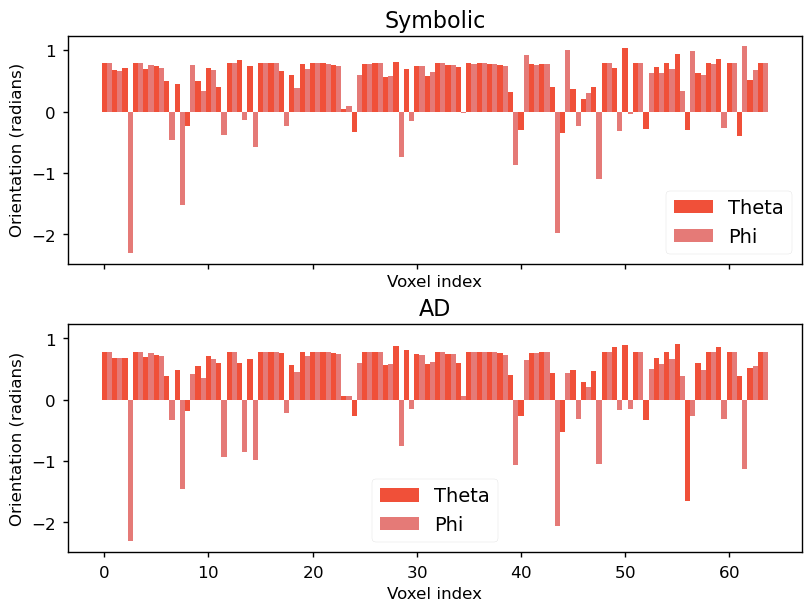

In [98]:
plot_debugging_orientations(paths, ["Symbolic", "AD"], shape = (2,1))

In [99]:
print( np.allclose( scipy.io.loadmat(paths[0])["s"]["theta"][0,0][0,0][0], scipy.io.loadmat(paths[1])["s"]["theta"][0,0][0,0][0] ) )
print( np.allclose( scipy.io.loadmat(paths[0])["s"]["phi"][0,0][0,0][0], scipy.io.loadmat(paths[1])["s"]["phi"][0,0][0,0][0] ) )


False
False


In [105]:
# This has been corrected. 
filenames = [r"grad_a_sym_it1_anisotropic.mat", r"grad_a_AD_it1_anisotropic.mat"]#, "grad_theta_1_it1_issue.mat"]
paths = [r"../Data sets/Debug Data/" + name  for name in filenames]

symbolic_aniso = scipy.io.loadmat(paths[0])["grad_a"]
AD_aniso = scipy.io.loadmat(paths[1])["grad_a"]

print( np.allclose( symbolic_aniso, AD_aniso ) )

False


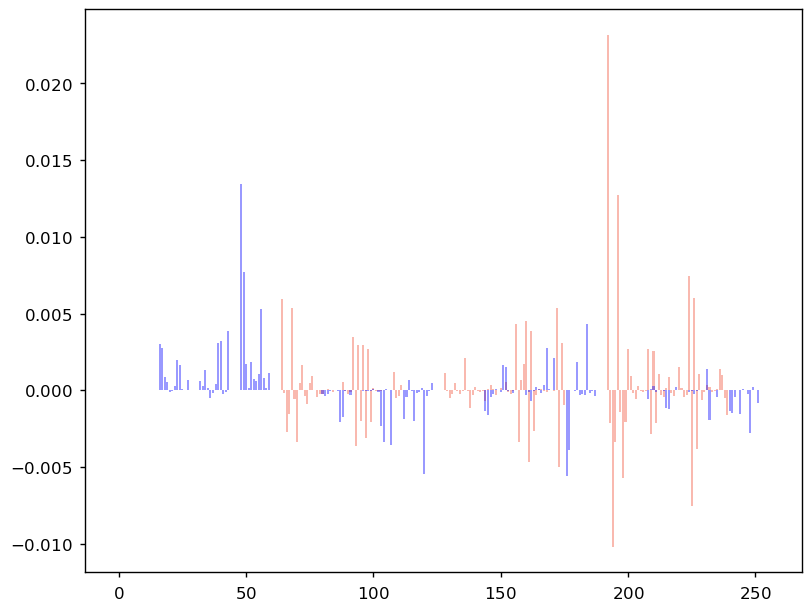

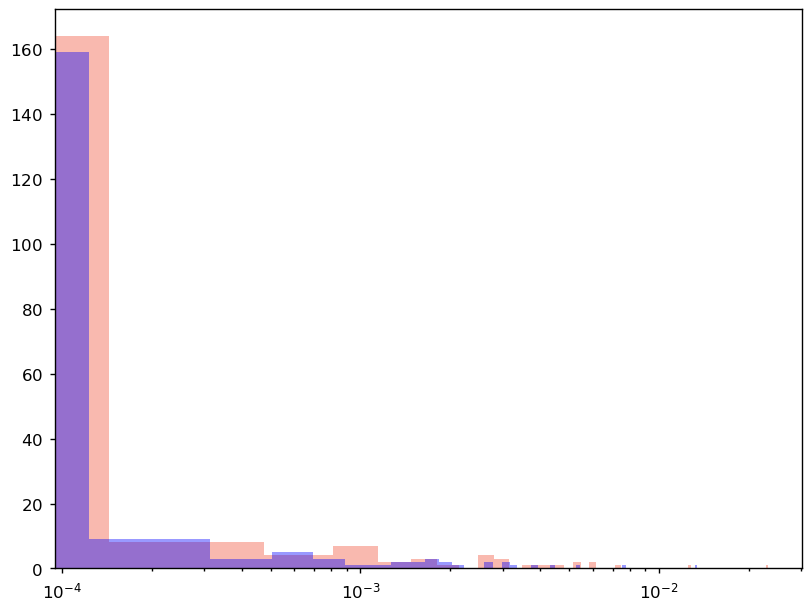

In [114]:
%matplotlib inline
length = np.prod(symbolic_aniso.shape)
x = np.arange(0, length)
plt.bar(x, np.ndarray.flatten(symbolic_aniso), label = "symbolic", alpha = 0.4)
plt.bar(x, np.ndarray.flatten(AD_aniso), color = "b", label = "AD", alpha= 0.4)
plt.show()
plt.hist(np.ndarray.flatten(symbolic_aniso), bins = 100, label = "symbolic", alpha = 0.4)
plt.hist(np.ndarray.flatten(AD_aniso), bins = 100, label = "AD", color = "b", alpha = 0.4)
plt.xscale("log")